## Face detection using computer vision

In this article we will be making face detection application and it will not only detect single face in the image but also detect multiple faces at the same time (if found). Here for detection we will be using the haar cascade classifiers for detection purpose we will learn all the technique and process which is involved to detect the faces in the image.

## Application of face detection

1. Face recognition: Face recognition is just like a carry forward step i.e. just after face detection we used to perform the face recognition.
2. Filters: Nowdays we are living in the social media world and we can see that there are variety of filters and fun applications in the global market to make such applications also we need to first detect the faces then apply the filter.
3. Face unlock application: We have often use this feature in our phones but do we know the building block for this application is also to detect the face first.

### Loading the necessary libraries

In [1]:
# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

1. Numpy library will play a role in reading the image in the machine readable format
2. cv2 library is basically the soul of the face detection as it will provide all the essential libraries for detection of faces in the image.
3. Matplotlib library is used to plot the results of the detection and make us find out that how the detection techniques performed on the image

### Loading images

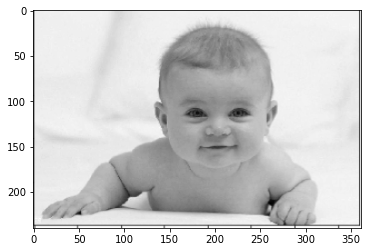

In [2]:
#  Loading the image to be tested
test_image = cv2.imread('data/baby1.png')

# Here we are converting the colored image into gray image 
if(test_image is not None):
    test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image_gray

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

As we are well aware of the fact that detector function of OpenCV by default read the existence image in the BGR format but the BGR format is not usually considered for the end user hence we need to convert the BGR format image to RGB format i.e. colored image which has all the 3 channels (R-Red, G-Green, B-Blue) that are responsible to create a colored image.

Hence we will be creating a clear cut function to just convert the coming BGR images to RGB images.

In [3]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Haar cascade files

HAAR cascade is a well coined term in the world of computer vision when we talk about haar cascade classifiers it's not only about the face pre-trained classifiers we can get the classifiers which are trained to detect smile,car,bus and these cascades files are always in the format of xml files usually we use the existing cascade files but for a fact we can also create them here for simplicity we will just use the haar cascade frontal face classifier to detect the font position of face in the image

### Loading the classifier for frontal face

In [4]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_alt2.xml')

### Face detection

For face detection we need to have the coordinates of the faces from coordinate I mean the x,y coordinate and the also the height and width of the face then only we can plot or draw rectangle over the image following the given coordinates for that we have the detectMultiScale function which will provide us all the needed coordinates to plot the rectangle.

In [12]:
face_coordinate = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(face_coordinate))      

Faces found:  1


So previously while using detectMultiScale function we acquired the x coordinate and y coordinate of the image along with the height and width so now we will be using these points to loop through each point of the image and draw the rectangle over the face with thickness of 2 pixel 

In [13]:
for (x_face,y_face,w_face,h_face) in face_coordinate:
     cv2.rectangle(test_image, (x_face, y_face), (x_face+w_face, y_face+h_face), (0, 255, 0), 2)
        

As the complete process is done so now it's time to check that all the steps that we have performed by far is worth it or not so with the help of imshow function of matplotlib we will see the processed image and see if it is abel to detect the face in the image or not.

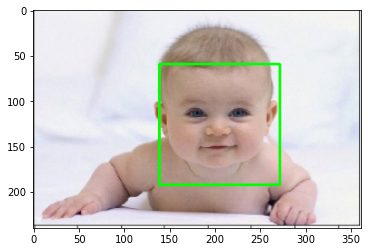

In [14]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

### Let's create a function which will automate the complete face detection process.

In [15]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # Here with the help of copy() function we will hold the copy of the original image
    image_copy = test_image.copy()
    
    # Here with the help of cvtColor function we are converting the image from BGR format to gray image
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Finally we are using the haar cascade function with detectMultiscale to get the coordiates of the faces in the given image
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=1)
    
    for (x_face, y_face, w_face, h_face) in faces_rect:
        cv2.rectangle(image_copy, (x_face, y_face), (x_face+w_face, y_face+h_face), (0, 255, 0), 2)
        
    return image_copy

Code-breakdown: Here we build the function to detect the faces let's see what is going in here:
1. Firstly we are using the copy function to store the original image so that any unwanted changes shouldn't be there in the original one 
2. Then we are converting the BGR format image to gray image as cv2 reads the image in gray format only for better readibility.
3. Then with the help of detectMultiScale function use of this is already mentioned in the comments.
4. At last we will plot the rectangle around the face with 2 pixel thickness and of green color with the help of coordinates that we got from the detectMultiScale function

### Testing the function on new image




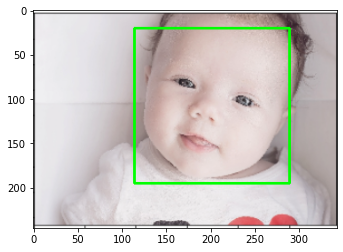

In [16]:
#loading image
test_image2 = cv2.imread('data/baby2.png')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))


### Now let's test our function on a group photograph to detect multiple faces

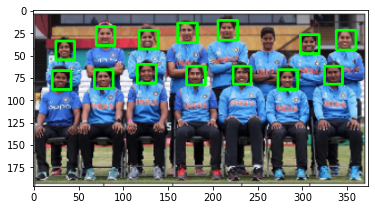

In [17]:
#loading image
test_image2 = cv2.imread('data/group.png')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))


### Saving the Image

In [18]:
 cv2.imwrite('image1.png',faces)

True

## Conclusion

1. So firstly we started with importing necessary libraries and loading the images on which we need to perform face detection.
2. Then we learnt about the haar cascade files and frontal face classifiers along with that learnt the use of detectMultiScale function.
3. As we realised that the whole process of detection is time taking so we tried to build a function which will automate this process.
4. Then with the use of function we detected the faces not only one but for group image.
5. At the last we saved the image with the detected faces.